# Kontext (Dominique)
Identifizierung der Datenquelle, Beschaffung der Daten, Problem- und Fragestellung, Zielsetzung, Vorgehen & Methoden

- Aus der Webseite Informationen holen.. um was geht es? 
- Warum haben wir diesen Datensatz gewaehlt?
- Mögliche Forschungsfrage: "Wie genau kann die Schwere von Verkehrsunfällen anhand von historischen Daten vorhergesagt werden, und welche Merkmale tragen am meisten zur Vorhersage bei?" 
- Ziel: Schweregrad eines Unfalles vorhersagen koennen anhand unserer Datapoints
- Vorgehen und Methoden: ? 

Für unser Python-Datenprojekt nutzen wir einen Datensatz von opendata.swiss, der detaillierte Informationen zu Straßenverkehrsunfällen mit Personenschaden in der Schweiz enthält. Dieser Datensatz umfasst eine Vielzahl an Merkmalen wie Unfalltyp, Beteiligte, Straßenart, geografische Lage sowie Zeitpunkt und Schweregrad des Unfalls. 


Die Vorhersage des Schweregrades von Verkehrsunfällen ist eine komplexe Aufgabe, da zahlreiche Faktoren das Unfallgeschehen beeinflussen. Bisherige Ansätze zur Unfallanalyse sind oft deskriptiv und fokussieren auf vergangene Ereignisse. Es fehlt jedoch ein Modell, das auf Basis historischer Daten präzise Vorhersagen über die Schwere zukünftiger Unfälle machen kann. Dies ist besonders relevant, um präventive Massnahmen und gezielte Verbesserungen in der Verkehrssicherheit zu fördern.

Das Ziel unseres Projekts ist daher die Entwicklung eines Modells, das den Schweregrad von Unfällen vorhersagen kann, durch die Klassifikation in leichte, schwere und tödliche Verletzungen. Gleichzeitig möchten wir die entscheidenden Einflussfaktoren identifizieren, um auf Basis dieser Erkenntnisse konkrete Präventionsstrategien für risikobehaftete Verkehrssituationen ableiten zu können.

Unsere zentrale Fragestellung lautet: Wie genau kann die Schwere von Verkehrsunfällen anhand historischer Daten vorhergesagt werden, und welche Faktoren tragen am meisten zur Vorhersage bei?

Wir beginnen mit einer Explorativen Datenanalyse (EDA), um grundlegende Muster in den Daten zu erkennen. Darauf folgen Datenbereinigung und -transformation, um etwaige Lücken und Inkonsistenzen zu beheben. Anschließend identifizieren wir durch Feature Selection & Engineering die wichtigsten Merkmale für die Modellierung. Mehrere Modelle werden trainiert und valuiert, bevor sie abschließend mit Explainable AI (XAI) analysiert werden, um die Entscheidungsgrundlagen des Modells zu verstehen und fundierte Einblicke in die Hauptfaktoren zur Unfallvorhersage zu gewinnen.

## EDA 
Bei der explorativen Datenanalyse (EDA) werden Grafiken und Visualisierungen eingesetzt, um einen Datensatz zu untersuchen und zu analysieren. 

Daten beschreiben, Identifizierung und Verstehen von Beziehungen und Gruppen, Hypothesentest.

Explorative Datenanalyse (EDA)
A. Überblick über die Datenstruktur

Datenübersicht: Überblick über die Anzahl der Zeilen und Spalten, Datentypen und erste Einblicke in fehlende Werte.
Zusammenfassung der Kategorien: Überblick über die wichtigsten kategorialen Variablen wie AccidentType, AccidentSeverityCategory, RoadType, AccidentWeekDay, und AccidentHour. Dies hilft zu verstehen, welche Variablen möglicherweise unterschiedlich stark vertreten sind und wie viele verschiedene Kategorien vorhanden sind.
B. Verteilungen der Merkmale

Unfalltypen (AccidentType): Analyse der Häufigkeit verschiedener Unfalltypen. Ein Balkendiagramm kann hier hilfreich sein, um festzustellen, welche Arten von Unfällen am häufigsten auftreten.
Unfallschwere (AccidentSeverityCategory): Verteilung der Schweregrade. Ein Balkendiagramm oder Kreisdiagramm gibt Aufschluss darüber, welche Schweregrade am häufigsten auftreten.
Zeitliche Merkmale: Analyse der Verteilungen nach AccidentYear, AccidentMonth, AccidentWeekDay, und AccidentHour. So erkennen wir mögliche saisonale oder zeitliche Muster (z. B. mehr Unfälle zu bestimmten Uhrzeiten oder Wochentagen).
C. Beziehungen zwischen Merkmalen

Unfallschwere und Unfalltyp: Untersuchen, ob bestimmte Unfalltypen häufiger mit bestimmten Schweregraden in Verbindung stehen.
Straßentyp (RoadType) und Unfallschwere: Feststellen, ob bestimmte Straßentypen eher mit schweren Unfällen in Verbindung gebracht werden können.
Zeitliche Einflüsse auf die Schwere: Untersuchung, ob die Uhrzeit, der Wochentag oder der Monat einen Einfluss auf die Schwere der Unfälle hat.
D. Geographische Analyse (optional)

Unfallstandorte: Mittels AccidentLocation_CHLV95_E und AccidentLocation_CHLV95_N die Unfallorte visualisieren, z. B. durch eine Heatmap, um Häufungen zu identifizieren.
Kantonale Analyse (CantonCode): Verteilung der Unfälle nach Kantonen, um zu sehen, ob es regionale Unterschiede gibt.
E. Hypothesentest (optional)

Ein statistischer Test könnte Hypothesen zur Abhängigkeit zwischen Unfallschwere und weiteren Variablen wie Unfalltyp, Straßentyp oder Uhrzeit testen.

#### Daten importieren

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
df_original = pd.read_csv("data/RoadTrafficAccidentLocations.csv", sep=",", low_memory=False)
df_original = df_original.drop(df_original.columns[0], axis=1)

# Erste fünf Zeilen des Datensatzes anzeigen
df_original.head()

,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,AccidentSeverityCategory_en,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,16.0,16h-17h
1,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,0.0,00h-01h
2,at1,Überholunfall oder Fahrstreifenwechsel,accident lors d'un dépassement ou lors d'un ch...,Incidente di sorpasso o al cambiamento di corsia,Accident when overtaking or changing lanes,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw402,Dienstag,mardi,Martedì,Tuesday,11.0,11h-12h
3,at8,Fussgängerunfall,accident impliquant des piétons,Incidente con pedoni,Accident involving pedestrian(s),as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw401,Montag,lundi,Lunedí,Monday,11.0,11h-12h
4,at4,Einbiegeunfall,accident en s'engageant sur une route,Incidente nell’immettersi in una strada,Accident when turning-into main road,as2,Unfall mit Schwerverletzten,accident avec blessés graves,Incidente con feriti gravi,Accident with severe injuries,...,janvier,Gennaio,January,aw401,Montag,lundi,Lunedí,Monday,8.0,08h-09h


#### Überblick über die Datenstruktur

In [4]:
# Überblick über die Anzahl der Zeilen und Spalten, Datentypen und fehlende Werte
data_overview = {
    "Anzahl der Zeilen": df_original.shape[0],
    "Anzahl der Spalten": df_original.shape[1],
    "Datentypen": df_original.dtypes,
    "Fehlende Werte": df_original.isnull().sum()
}
print("Datenübersicht:", data_overview)

Datenübersicht: {'Anzahl der Zeilen': 232303, 'Anzahl der Spalten': 35, 'Datentypen': AccidentType                    object
AccidentType_de                 object
AccidentType_fr                 object
AccidentType_it                 object
AccidentType_en                 object
AccidentSeverityCategory        object
AccidentSeverityCategory_de     object
AccidentSeverityCategory_fr     object
AccidentSeverityCategory_it     object
AccidentSeverityCategory_en     object
AccidentInvolvingPedestrian       bool
AccidentInvolvingBicycle          bool
AccidentInvolvingMotorcycle       bool
RoadType                        object
RoadType_de                     object
RoadType_fr                     object
RoadType_it                     object
RoadType_en                     object
AccidentLocation_CHLV95_E        int64
AccidentLocation_CHLV95_N        int64
CantonCode                      object
MunicipalityCode                 int64
AccidentYear                     int64
AccidentMonth    

Interpretation: 
Der Datensatz enthält insgesamt 232.303 Zeilen und 35 Spalten. 
Die Datentypen umfassen hauptsächlich Objekttypen (für Texte und Kategorien), einige Boolesche Variablen und numerische Typen wie int64 und float64. 
Die Spalte AccidentHour und AccidentHour_text haben jeweils 5 fehlende Werte, während alle anderen Spalten vollständig sind, also keine fehlenden Werte aufweisen. 
Diese hohe Datenintegrität erleichtert die Analyse und reduziert den Aufwand für die Datenbereinigung.

#### Visualisierung der Verteilung von kategorialen Variabeln

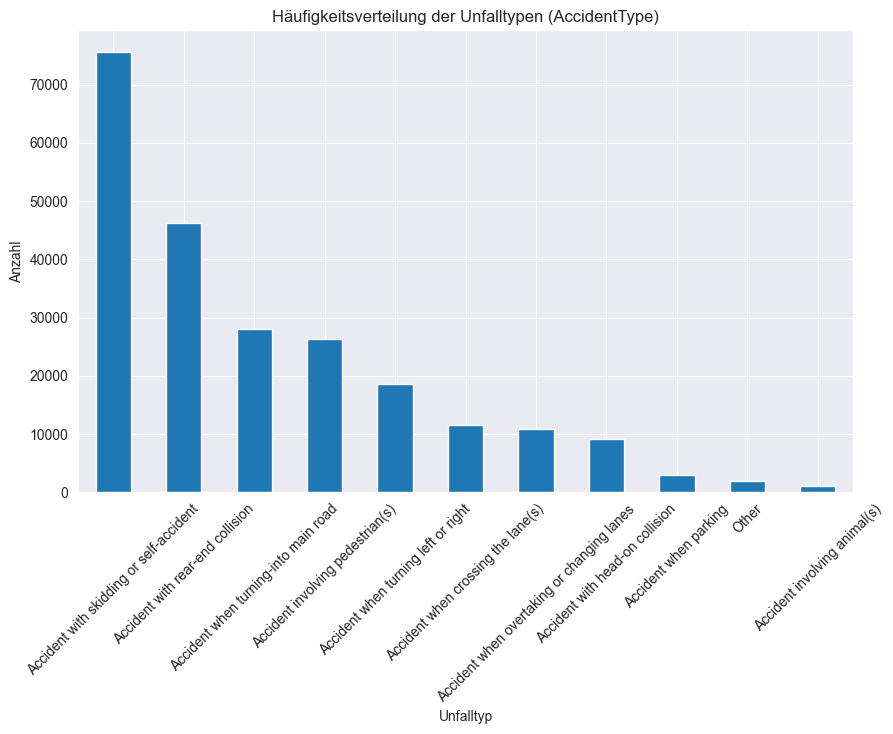

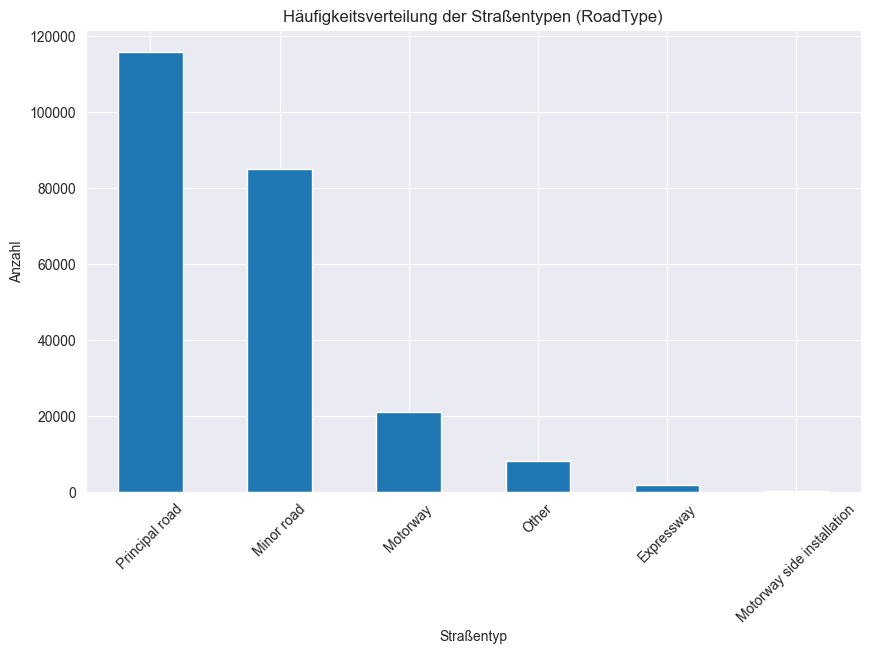

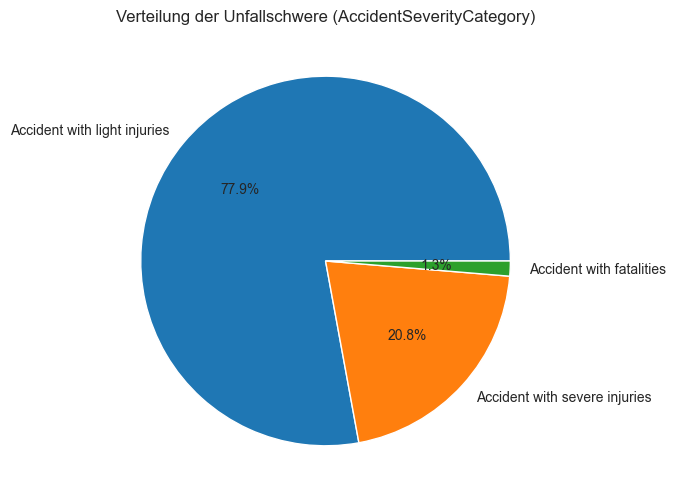

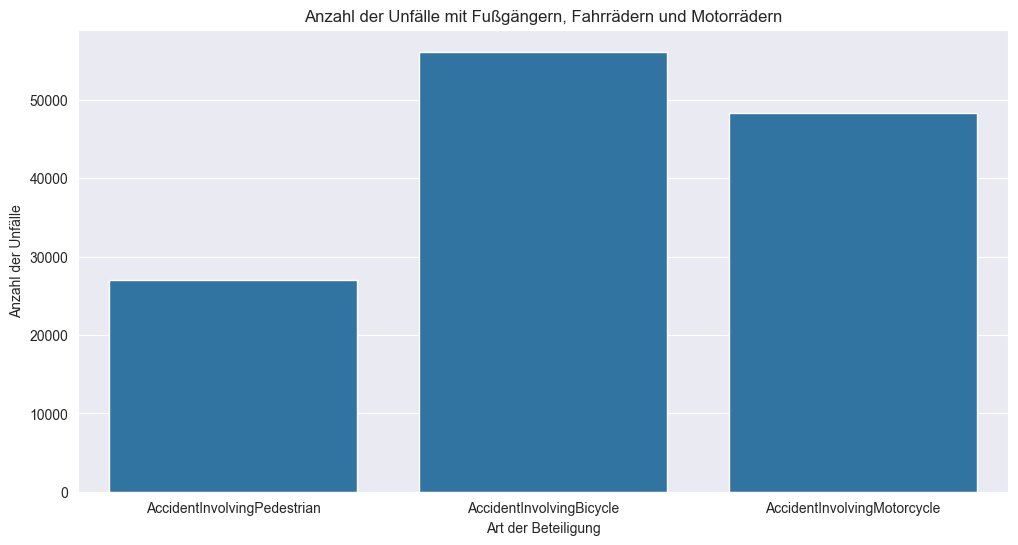

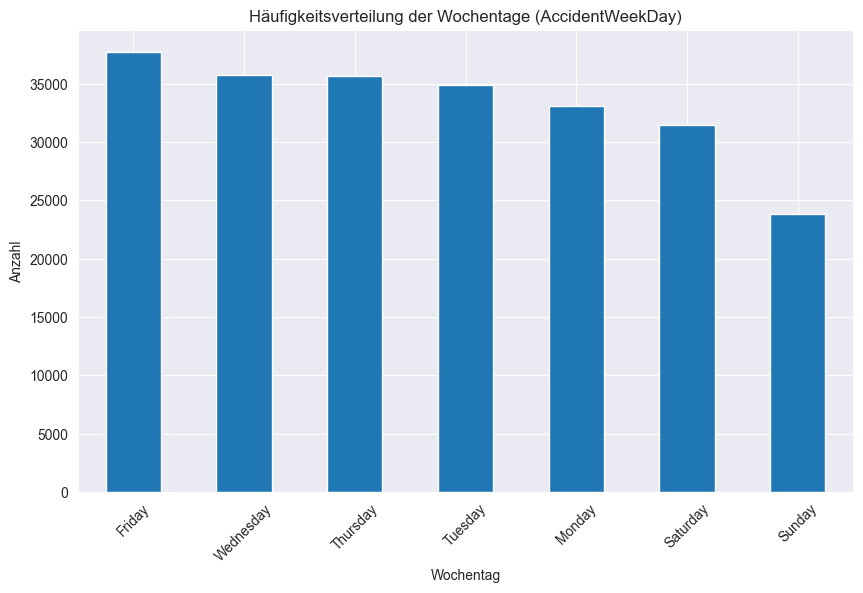

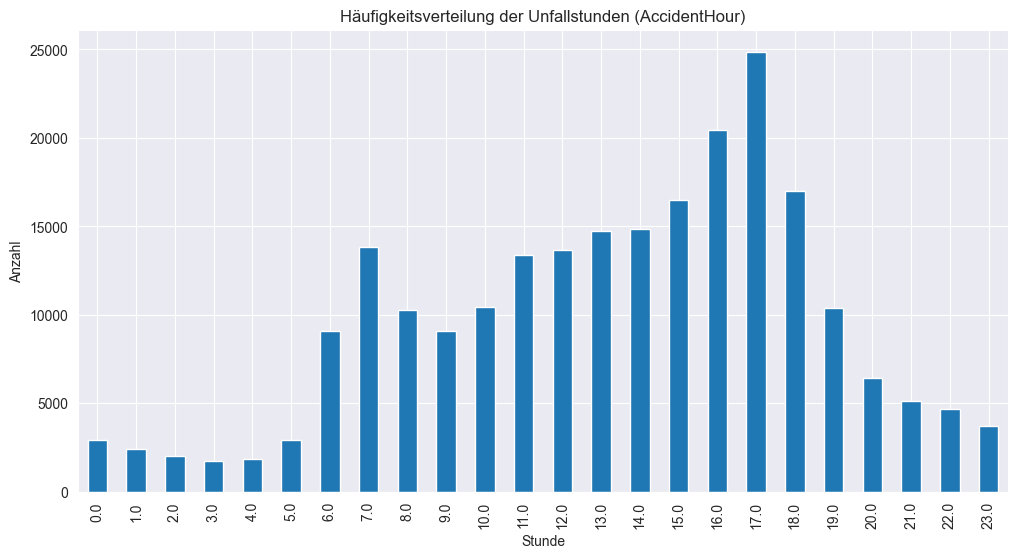

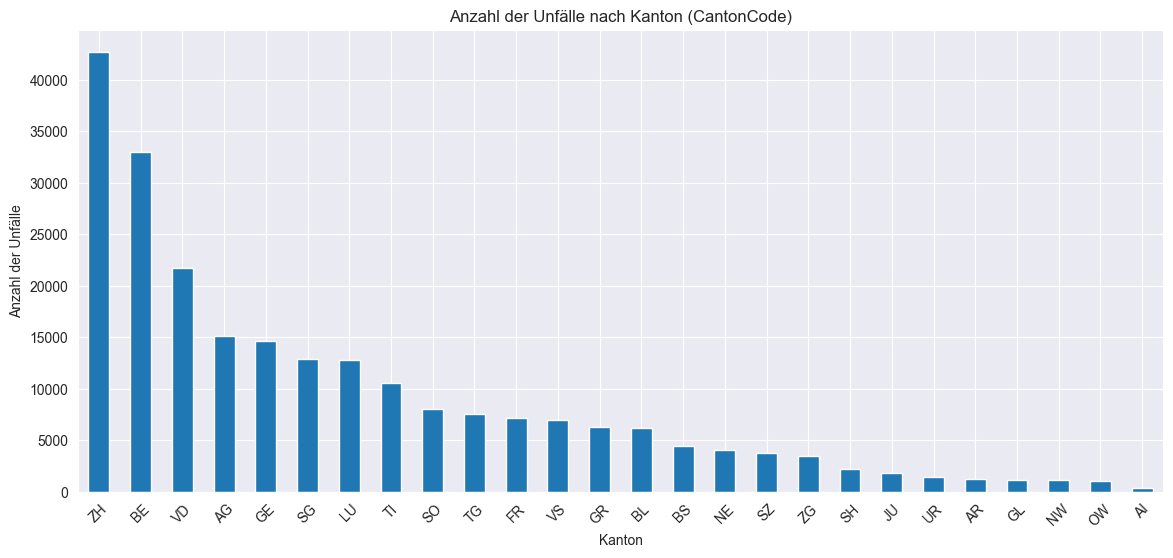

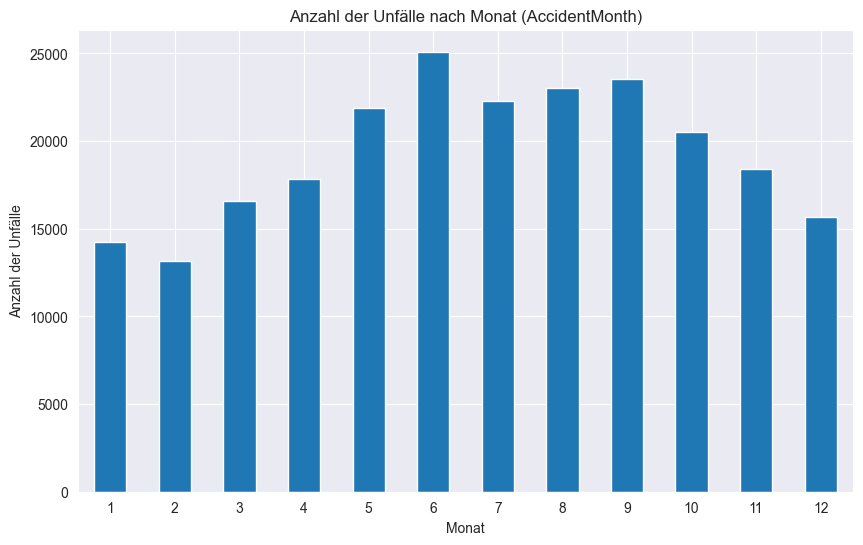

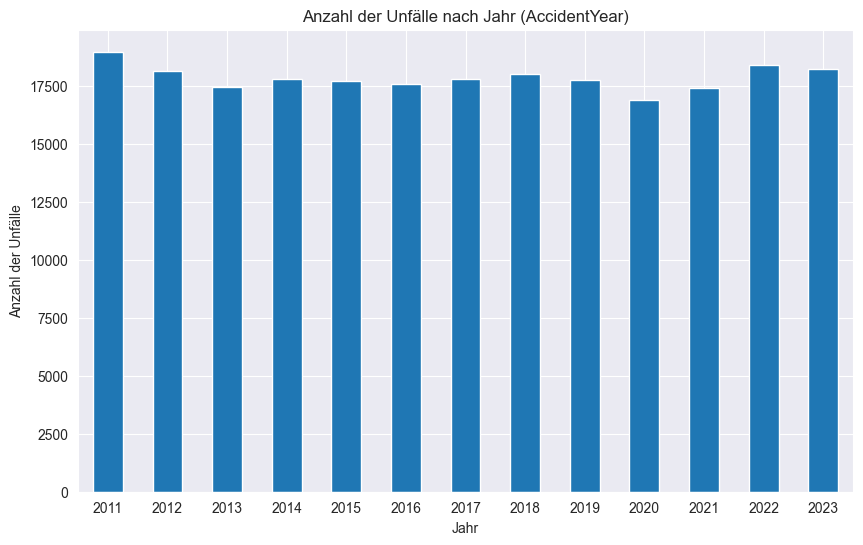

In [5]:
# Unfalltypen (AccidentType)
plt.figure(figsize=(10, 6))
df_original['AccidentType_en'].value_counts().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Unfalltypen (AccidentType)')
plt.xlabel('Unfalltyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

# Strassentyp (RoadType)
plt.figure(figsize=(10, 6))
df_original['RoadType_en'].value_counts().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Straßentypen (RoadType)')
plt.xlabel('Straßentyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

# Unfallschwere (AccidentSeverityCategory)
plt.figure(figsize=(6, 6))
df_original['AccidentSeverityCategory_en'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verteilung der Unfallschwere (AccidentSeverityCategory)')
plt.ylabel('')
plt.show()

# Gruppierte Balkendiagramme für die Beteiligung von Fußgängern, Fahrrädern und Motorrädern nach Unfallschwere
plt.figure(figsize=(12, 6))
data_melted = df_original.melt(value_vars=['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle'], 
                        var_name='Unfallbeteiligung', value_name='Beteiligt')

sns.countplot(data=data_melted[data_melted['Beteiligt']], x='Unfallbeteiligung')
plt.title('Anzahl der Unfälle mit Fußgängern, Fahrrädern und Motorrädern')
plt.xlabel('Art der Beteiligung')
plt.ylabel('Anzahl der Unfälle')
plt.show()

# Wochentag des Unfalls (AccidentWeekDay)
plt.figure(figsize=(10, 6))
df_original['AccidentWeekDay_en'].value_counts().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Wochentage (AccidentWeekDay)')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

# Unfallstunde (AccidentHour)
plt.figure(figsize=(12, 6))
df_original['AccidentHour'].value_counts().sort_index().plot(kind='bar')
plt.title('Häufigkeitsverteilung der Unfallstunden (AccidentHour)')
plt.xlabel('Stunde')
plt.ylabel('Anzahl')
plt.show()

# Verteilung nach Kanton (CantonCode)
plt.figure(figsize=(14, 6))
df_original['CantonCode'].value_counts().plot(kind='bar')
plt.title('Anzahl der Unfälle nach Kanton (CantonCode)')
plt.xlabel('Kanton')
plt.ylabel('Anzahl der Unfälle')
plt.xticks(rotation=45)
plt.show()

# Verteilung nach Monat (AccidentMonth)
plt.figure(figsize=(10, 6))
df_original['AccidentMonth'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl der Unfälle nach Monat (AccidentMonth)')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Unfälle')
plt.xticks(rotation=0)
plt.show()

# Verteilung nach Jahr (AccidentYear)
plt.figure(figsize=(10, 6))
df_original['AccidentYear'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl der Unfälle nach Jahr (AccidentYear)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Unfälle')
plt.xticks(rotation=0)
plt.show()

Interpretation aller Visualisierungen: 

Unfalltypen (AccidentType): Die häufigsten Unfalltypen sind „Schleuder- oder Selbstunfälle“ und „Auffahrunfälle“. Dies deutet darauf hin, dass Selbstkontrollverluste und Auffahrunfälle besonders häufig vorkommen, was auf schlechte Wetterbedingungen, Unaufmerksamkeit oder zu geringen Abstand im Verkehr hinweisen könnte.

Straßentypen (RoadType): Die meisten Unfälle ereignen sich auf Hauptstrassen und Nebenstrassen, während Autobahnen deutlich weniger Unfälle aufweisen. Dies könnte daran liegen, dass Haupt- und Nebenstrassen stärker befahren sind und unterschiedliche Verkehrsbedingungen aufweisen, wie z. B. Kreuzungen und Fussgängerüberwege.

Unfallschwere (AccidentSeverityCategory): Die meisten Unfälle führen zu leichten Verletzungen (77,9%), gefolgt von Unfällen mit schweren Verletzungen (20,8%) und nur einem kleinen Anteil an tödlichen Unfällen (1,3%). Diese Verteilung könnte darauf hindeuten, dass die meisten Unfälle eher geringfügig sind und auf moderat befahrenen Strassen oder niedrigen Geschwindigkeiten auftreten.

Unfälle mit spezifischer Beteiligung (Fußgänger, Fahrräder, Motorräder): Unfälle mit Fahrrädern und Motorrädern sind häufiger als solche mit Fussgängern. Dies könnte auf die größere Verwundbarkeit und das häufigere Auftreten von Fahrrädern und Motorrädern im Strassenverkehr hindeuten.

Wochentag der Unfälle (AccidentWeekDay): Unfälle treten an Wochentagen relativ gleichmäßig auf, mit einem leichten Anstieg am Freitag und einem deutlichen Rückgang am Sonntag. Das könnte auf eine erhöhte Mobilität an Wochentagen und möglicherweise vermehrte Freizeitaktivitäten am Freitagabend hinweisen.

Unfallzeit (AccidentHour): Die Anzahl der Unfälle ist morgens (insbesondere um 7 Uhr) und am späten Nachmittag (17 Uhr) am höchsten. Dies könnte mit den Pendelzeiten zusammenhängen, wenn das Verkehrsaufkommen am höchsten ist.

Unfälle nach Kanton (CantonCode): Die Kantone Zürich und Bern weisen die höchsten Unfallzahlen auf, gefolgt von Waadt und Aargau. Dies könnte daran liegen, dass diese Kantone bevölkerungsreicher sind und höhere Verkehrsaufkommen haben.

Monatliche Verteilung der Unfälle (AccidentMonth): Die Unfälle sind im Sommermonat Juni am höchsten, was auf erhöhte Aktivitäten und Reisemobilität im Sommer hinweisen könnte. Die niedrigsten Unfallzahlen finden sich in den Wintermonaten, möglicherweise wegen geringerer Mobilität oder vorsichtigerem Fahren bei schlechten Wetterbedingungen.

Jährliche Verteilung der Unfälle (AccidentYear): Die Unfallzahlen sind über die Jahre relativ konstant geblieben, was auf stabile Verkehrsbedingungen und Sicherheitsvorkehrungen hinweisen könnte, ohne signifikante Ab- oder Zunahme in der Unfallhäufigkeit.

#### Untersuchung von Beziehungen zwischen Merkmalen

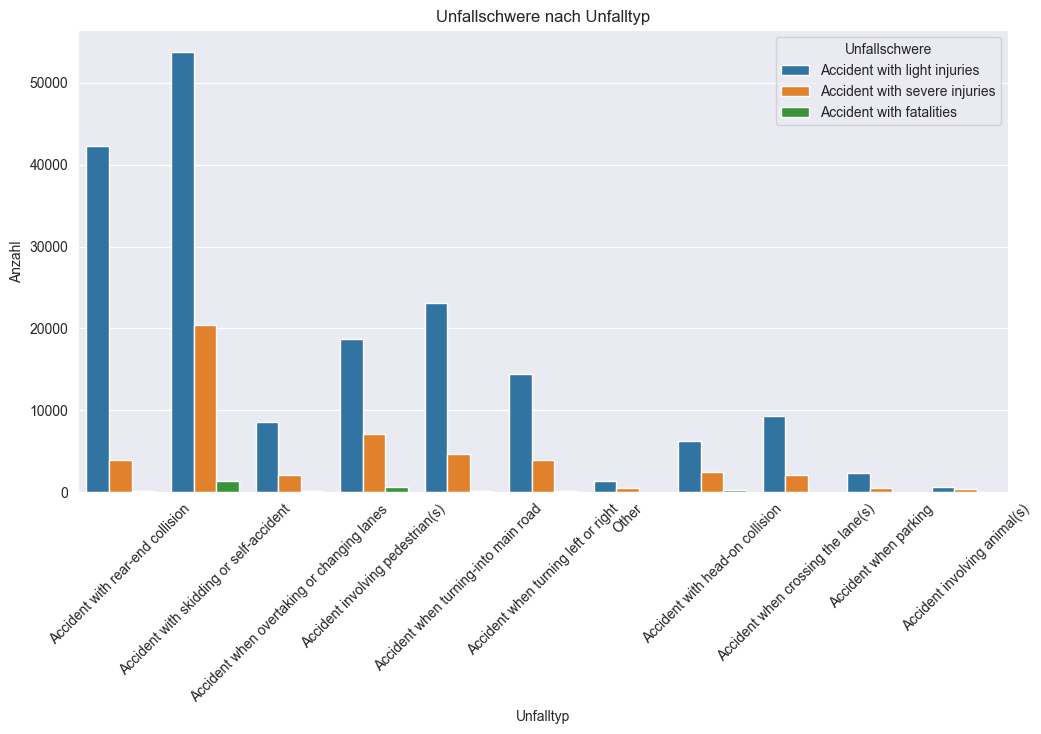

In [6]:
# Unfalltyp und Schweregrad
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='AccidentType_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Unfalltyp')
plt.xlabel('Unfalltyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()

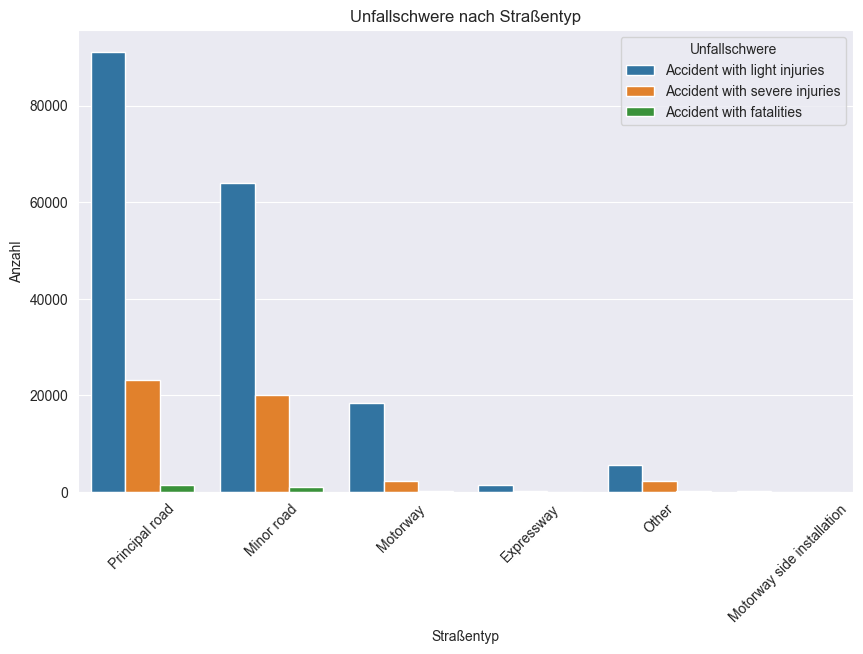

In [7]:
# Strassentyp und Schweregrad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='RoadType_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Straßentyp')
plt.xlabel('Straßentyp')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()


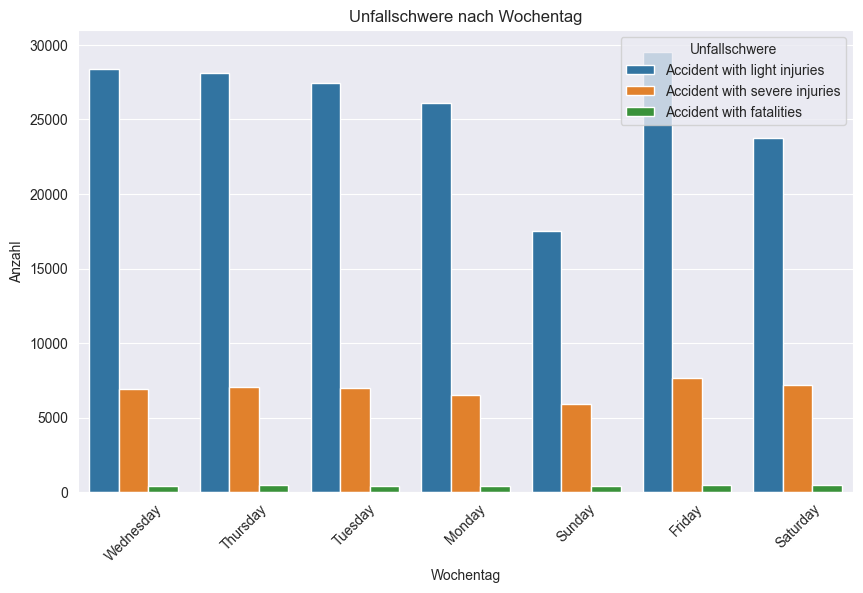

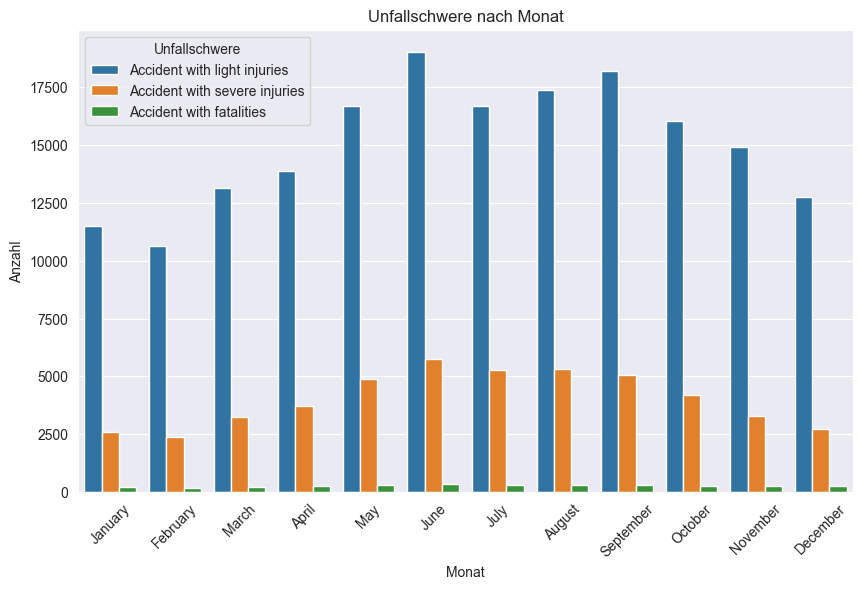

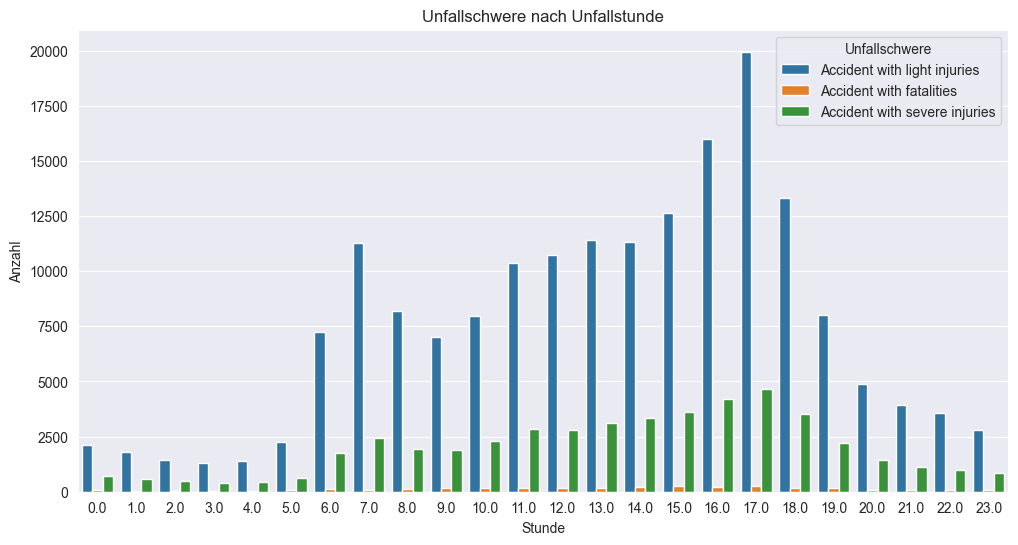

In [8]:
#Zeitliche Einflüsse auf Schweregrad
# Wochentag und Unfallschwere
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='AccidentWeekDay_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()

# Monat und Unfallschwere
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='AccidentMonth_en', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Unfallschwere')
plt.show()

# Unfallstunde und Unfallschwere
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='AccidentHour', hue='AccidentSeverityCategory_en')
plt.title('Unfallschwere nach Unfallstunde')
plt.xlabel('Stunde')
plt.ylabel('Anzahl')
plt.legend(title='Unfallschwere')
plt.show()

Interpretation: 
Die EDA zeigt, dass verschiedene Merkmale potenziell Hinweise auf den Schweregrad eines Unfalls geben könnten. Diese Merkmale könnten genutzt werden, um ein Modell zur Vorhersage des Unfall-Schweregrades zu entwickeln. Ein solches Modell könnte helfen, gefährdete Zeiträume, Straßen und Umstände zu identifizieren und gezielte Präventionsmassnahmen zu ergreifen.

#### Geographische Analyse

In [9]:
import folium
from pyproj import Transformer

# Transformer für die Umrechnung von LV95 (EPSG:2056) nach WGS84 (EPSG:4326)
transformer = Transformer.from_crs("EPSG:2056", "EPSG:4326", always_xy=True)

# Koordinaten für die Mitte der Karte berechnen (nach Umrechnung)
avg_lat, avg_lon = transformer.transform(df_original['AccidentLocation_CHLV95_E'].mean(), df_original['AccidentLocation_CHLV95_N'].mean())

# Map erstellen mit umgerechneten Mittelwerten als Startpunkt
m = folium.Map(location=[avg_lon, avg_lat], zoom_start=10)

# Punkte hinzufügen (Koordinaten für jeden Unfallort umrechnen)
for _, row in df_original.iterrows():
    lon, lat = transformer.transform(row['AccidentLocation_CHLV95_E'], row['AccidentLocation_CHLV95_N'])
    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Karte speichern und anzeigen
m.save("Unfallkarte.html")
display(m)

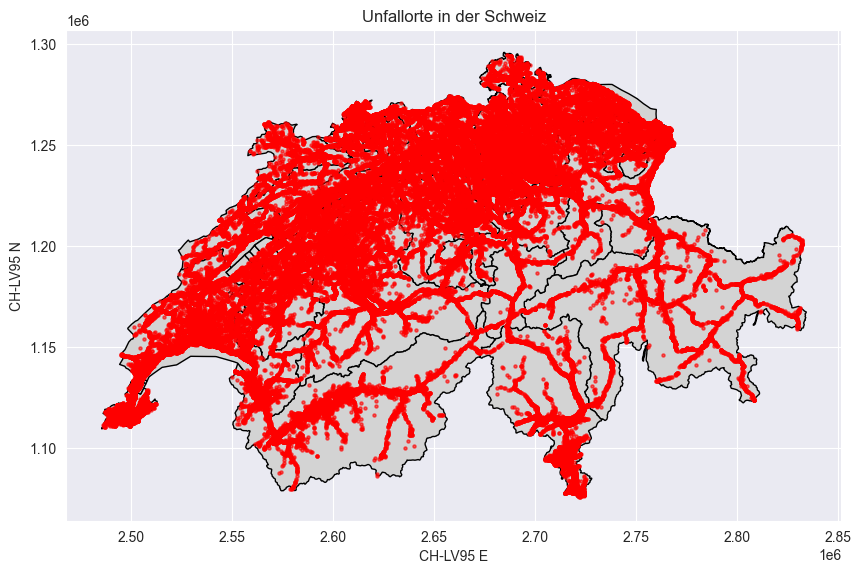

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# 1. Erstellen eines GeoDataFrames für die Unfalldaten mit festgelegtem CRS
# Koordinaten in Punkte umwandeln und direkt das LV95-Koordinatensystem (EPSG:2056) setzen
df_original['geometry'] = df_original.apply(lambda row: Point(row['AccidentLocation_CHLV95_E'], row['AccidentLocation_CHLV95_N']), axis=1)
accident_gdf = gpd.GeoDataFrame(df_original, geometry='geometry', crs="EPSG:2056")

# 2. Laden der Schweiz-Karte mit Kantonsgrenzen und Setzen des Koordinatensystems auf WGS84 (EPSG:4326)
swiss_map_path = 'data/gadm41_CHE_1.shp'
swiss_map = gpd.read_file(swiss_map_path)

# Setze das CRS des Shapefiles auf WGS84 (EPSG:4326), falls es nicht definiert ist
if swiss_map.crs is None:
    swiss_map.set_crs("EPSG:4326", inplace=True)

# Die Karte ins LV95-Koordinatensystem umprojizieren
swiss_map = swiss_map.to_crs("EPSG:2056")

# 3. Plotten der Karte und der Unfalldaten
fig, ax = plt.subplots(figsize=(10, 10))
swiss_map.plot(ax=ax, color='lightgrey', edgecolor='black')  # Hintergrundkarte der Kantone
accident_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)  # Unfallorte als rote Punkte

# Beschriftungen und Titel
plt.title("Unfallorte in der Schweiz")
plt.xlabel("CH-LV95 E")
plt.ylabel("CH-LV95 N")
plt.show()

Interpretation: 
Diese Visualisierung verdeutlicht, dass Unfälle in der Schweiz stark mit dem Verkehrsaufkommen und der Infrastruktur korrelieren. Städte, Hauptverkehrsstrassen und Autobahnen sind am stärksten betroffen. In weniger dicht besiedelten oder abgelegenen Gebieten ist die Unfallrate deutlich geringer, was durch die geringere Dichte der roten Punkte repräsentiert wird. Dies entspricht wahrscheinlich dem geringeren Verkehrsaufkommen in diesen Regionen.

#### Hypothesentests

##### Beziehung zwischen Strassentyp und Unfallschweregrad
###### Nullhypothese
Es gibt keinen Zusammenhang zwischen dem Strassentyp und der Schwere des Unfalls. Der Strassentyp hat keinen Einfluss auf die Wahrscheinlichkeit eines schweren Unfalls. 
###### Alternativhypothese
Es gibt einen signifikanten Zusammenhang zwischen dem Strassentyp und der Schwere des Unfalls. Bestimmte Strassentypen sind eher mit schwereren Unfällen verbunden.

In [60]:
# Chi-Quadrat-Test
from scipy.stats import chi2_contingency

# Kontingenztabelle für RoadType und AccidentSeverityCategory
contingency_table = pd.crosstab(df_original['RoadType'], df_original['AccidentSeverityCategory'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p)
print("Freiheitsgrade:", dof)


Chi-Quadrat-Statistik: 2204.3659514731253
p-Wert: 0.0
Freiheitsgrade: 10


Interpretation: zwischen dem Strassentyp und der Unfallschwere. Das deutet darauf hin, dass bestimmte Strassentypen eher mit schwereren oder leichteren Unfällen verbunden sind. Dies könnte auf unterschiedliche Risiken je nach Strassentyp hinweisen und liefert potenziell wertvolle Hinweise für gezielte Verkehrssicherheitsmaßnahmen auf bestimmten Strassen.

##### Zusammenhang zwischen Wochentag und Unfallschweregrad
###### Nullhypothese
Es besteht kein Zusammenhang zwischen dem Wochentag des Unfalls und der Schwere des Unfalls. Die Unfallschwere ist unabhängig vom Wochentag.
###### Alternativhypothese
Es besteht ein Zusammenhang zwischen dem Wochentag des Unfalls und der Schwere des Unfalls. An bestimmten Wochentagen treten häufiger schwere Unfälle auf als an anderen.

In [9]:
# Chi-Quadrat-Test
from scipy.stats import chi2_contingency

# Kontingenztabelle für AccidentWeekDay und AccidentSeverityCategory erstellen
contingency_table = pd.crosstab(df_original['AccidentWeekDay'], df_original['AccidentSeverityCategory'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p)
print("Freiheitsgrade:", dof)


Chi-Quadrat-Statistik: 495.4779805347233
p-Wert: 2.032040787071382e-98
Freiheitsgrade: 12


Interpretation: Da der p-Wert extrem klein ist, zeigt das Ergebnis, dass die Verteilung der Unfallschweregrade tatsächlich vom Wochentag abhängt. Dies könnte darauf hinweisen, dass an bestimmten Wochentagen (z. B. Wochenenden oder Wochentagen mit hohem Verkehrsaufkommen) Unfälle häufiger schwerwiegender sind oder dass sich das Unfallrisiko in Bezug auf die Schwere variiert. Dieses Ergebnis könnte darauf hindeuten, dass gezielte Maßnahmen oder Untersuchungen an spezifischen Wochentagen sinnvoll wären.

## Unifying & Transformation 

Datentypen und Formate analysieren und bei Bedarf vereinheitlichen,
Daten sinnvoll zusammenführen

- Moegliche Kategorien zusammentun.. 

## Data Cleansing

Beurteilung der Datenqualität und erforderliche Bereinigung der Daten

- Unser Datensatz ist on point wegen Schweiz King
- Wenn wir Columns rausloeschen, warum? 

In [ ]:
#alle Spaltenausführungen auf en, it, fr löschen
df = df_original.drop(columns=df_original.filter(regex='(_en|_fr|_it)$').columns)
df.to_csv("data/filteredDataFrame.csv", index=False)

## Analysis & Validation 

Analyse der Verteilungen, Abweichungen, Kennzahlen gemäss Unterricht

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Vorbereitung des Datensatzes
df['AccidentSeverityCategory'] = df['AccidentSeverityCategory'].astype('category')

# Feature-Auswahl: Schließe die Zielvariable und unnötige Spalten aus
X = df.drop(columns=['AccidentSeverityCategory', 'AccidentSeverityCategory_de', 'AccidentHour_text'])
y = df['AccidentSeverityCategory']

# Kategorische Features in numerische Werte umwandeln (Label Encoding)
categorical_columns = X.select_dtypes(include=['object', 'category', 'bool']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Fehlende Werte (falls vorhanden) füllen
X.fillna(X.median(), inplace=True)

# Aufteilen in Trainings- und Testdaten (70% Training, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisiere und trainiere das Random Forest Modell
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = rf_model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance: Welche Features haben den größten Einfluss auf die Vorhersagen?
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
